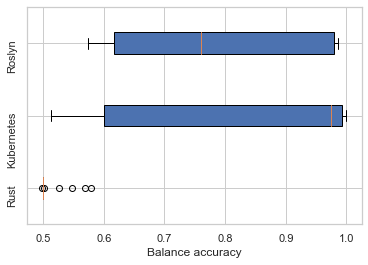

In [62]:
import pyodbc 
from datetime import datetime
from datetime import timezone
from tqdm.notebook import tqdm
# Now we calculate the defect proneness for each PR
import json
import matplotlib.pyplot as plt
from collections import defaultdict
 

server = 'localhost' 
databases = ['Rust','Kubernetes','Roslyn']
username = 'sa' 
password = 'test' 
fig = plt.figure()
ax = fig.add_subplot(111)
import os

os.chdir('./RQ1/')

b_accs=[]
b_acc_dict=defaultdict(list)
for database in databases:
    cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
    cursor = cnxn.cursor()
    # fetch all the PRs
    cursor.execute(f""" SELECT [Id]
          ,[ModelParam]
      FROM [{database}].[dbo].[Periods]""")
    periods = cursor.fetchall()

    b_acc=[]
    ids=[]
    for period in periods:
        if not period[1]:
            continue
        temp = json.loads(period[1])
        b_acc +=[temp['balanced_acc']]
        b_acc_dict[database] +=[temp['balanced_acc']]
        ids += [period[0] ]

    b_accs += [b_acc]
plt.boxplot(b_accs, patch_artist = True,
                 vert = 0)
ax.set_xlabel("Balance accuracy")
# ax.set_ylabel("Project name")
ax.set_yticklabels(databases)
plt.yticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees


image_format = 'svg' # e.g .png, .svg, etc.
image_name = f'all_balanced_accuracy.svg'

plt.savefig(f'./{image_name}', format=image_format, dpi=1200)

plt.show()


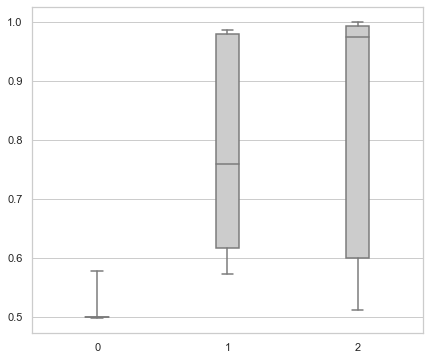

In [63]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = b_acc_dict.values()

f, ax = plt.subplots(figsize=(7, 6))
#Get data in proper format
fixed_data = list(sorted(data))


#Set up the graph parameters
sns.set(context='notebook', style='whitegrid')


#Plot the graph
p = sns.boxplot(data=fixed_data, whis=np.inf, width=.18,color=".8")
# sns.stripplot(data=fixed_data, size=6, edgecolor="black", linewidth=.9,alpha=.5,color=".1")
# sns.plt.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)

plt.show()

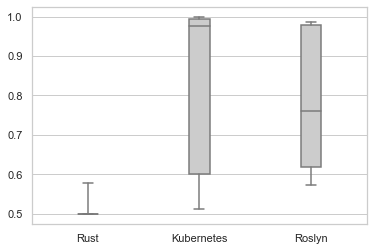

In [66]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(dict(b_acc_dict), orient='index')
df = df.transpose()


#Plot the graph
p = sns.boxplot(data=df, whis=np.inf, width=.18,color=".8")
# sns.stripplot(data=fixed_data, size=6, edgecolor="black", linewidth=.9,alpha=.5,color=".1")
# sns.plt.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
image_format = 'svg' # e.g .png, .svg, etc.
image_name = f'seaborn_all_balanced_accuracy.svg'

plt.savefig(f'./{image_name}', format=image_format, dpi=1200)

plt.show()

In [57]:
df

,Rust,Kubernetes,Roslyn,0
0,0.578951,0.616741,0.607725,NaN
1,0.547917,0.616196,0.617411,NaN
2,0.568761,0.603544,0.702646,NaN
3,0.501542,0.583493,0.759893,NaN
4,0.498192,0.593500,0.714673,NaN
5,0.500000,0.574747,0.641190,NaN
6,0.500000,0.581687,0.616870,NaN
7,0.500000,0.512853,0.592523,NaN
8,0.500000,0.972736,0.573932,NaN
9,0.500000,0.976649,0.594728,NaN
